# Rubin and Roman Filter Transmissions

Data from https://svo2.cab.inta-csic.es/theory/fps/index.php
and https://github.com/romanSpaceTelescope/roman-technical-information
and https://github.com/lsst/throughputs

In [1]:
from matplotlib import pyplot as plt 
import numpy as np
from os import path
from astropy.table import Table
from astropy.io import ascii

Load the data files with filter transmission data for the Rubin and Roman filters

In [2]:
data_dir = './data/'

# Note these are the filter transmission curves, without factoring in QE or optics transmission
rubin_filter_only = False
if rubin_filter_only:
    rubin_files = {
        'u': 'LSST_u_filter.dat',
        'g': 'LSST_g_filter.dat',
        'r': 'LSST_r_filter.dat',
        'i': 'LSST_i_filter.dat',
        'z': 'LSST_z_filter.dat',
        'y': 'LSST_y_filter.dat'
    }
else:
    rubin_files = {
        'u': 'LSST_u.dat',
        'g': 'LSST_g.dat',
        'r': 'LSST_r.dat',
        'i': 'LSST_i.dat',
        'z': 'LSST_z.dat',
        'y': 'LSST_y.dat'
    }

roman_files = {
    'F062': 'Roman_WFI_F062.dat',
    'F087': 'Roman_WFI_F087.dat',
    'F106': 'Roman_WFI_F106.dat',
    'F129': 'Roman_WFI_F129.dat',
    'F146': 'Roman_WFI_F146.dat',
    'F158': 'Roman_WFI_F158.dat',
    'F184': 'Roman_WFI_F184.dat',
    'F213': 'Roman_WFI_F213.dat',
    'P127': 'Roman_WFI_Prism.dat',
    'G150': 'Roman_WFI_Grism.dat'
}

twomass_files = {
    '2MASS-J': '2MASS_J.dat',
    '2MASS-H': '2MASS_H.dat',
    '2MASS-Ks': '2MASS_Ks.dat'
}

In [3]:
def load_file_set(data_dir, file_set):
    
    data = {}
    for f, file_name in file_set.items():
        data[f] = ascii.read(path.join(data_dir, file_name))

    return data

In [4]:
rubin_data = load_file_set(data_dir, rubin_files)
roman_data = load_file_set(data_dir, roman_files)
twomass_data = load_file_set(data_dir, twomass_files)

Plotting configuration

In [5]:
PLOT_COLORS = {
    "F062": "#5f038c",
    "F087": "#3303ab",
    "F106": "#0344a6",
    "F129": "#04b8ac",
    "F158": "#058c01",
    "F184": "#ab6902",
    "F213": "#7a0701",
    "F146": "#7d039c",
    "G150": "#080f17",
    "P127": "#333033",
    "u": "#6000ac",
    "g": "#0070ac",
    "r": "#e7d200",
    "i": "#e79a00",
    "z": "#9c1e02",
    "y": "#5d0018", 
    "2MASS-J": "#04b8ac", 
    "2MASS-H": "#058c01", 
    "2MASS-Ks": "#7a0701"
  }

LINE_STYLES = {
    "F062": "-",
    "F087": "-",
    "F106": "-",
    "F129": "-",
    "F158": "-",
    "F184": "-",
    "F213": "-",
    "F146": "-.",
    "G150": "-.",
    "P127": ":",
    "u": "-",
    "g": "-",
    "r": "-",
    "i": "-",
    "z": "-",
    "y": "-",
    "2MASS-J": "--", 
    "2MASS-H": "--", 
    "2MASS-Ks": "--"
  }

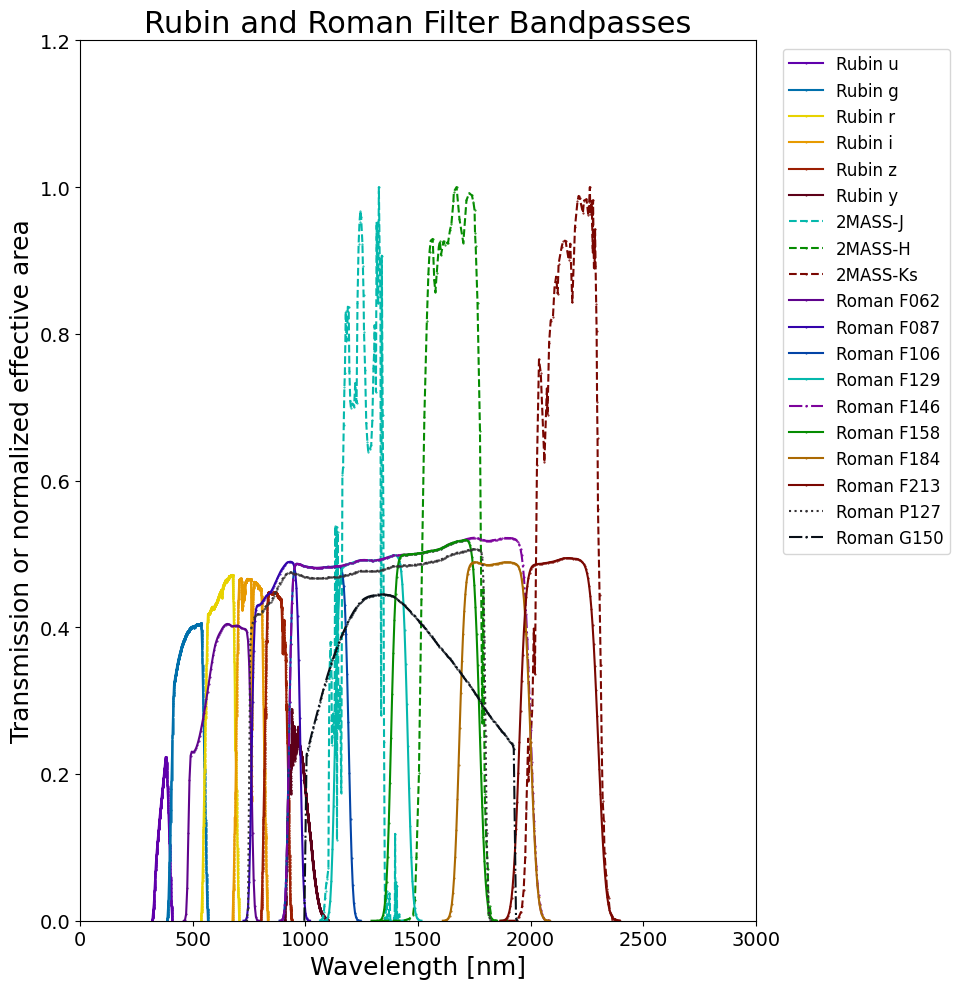

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# Plot Rubin transmission curves
for f, data, in rubin_data.items():
    xplot = data['col1'] / 10.0 # Convert Angstroms to nm
    ax.plot(xplot, data['col2'], c=PLOT_COLORS[f], marker='.', markersize=1, ls=LINE_STYLES[f], label='Rubin '+f)

use_twomass = True
if use_twomass:
    for f, data, in twomass_data.items():
        xplot = data['col1'] / 10.0 # Convert Angstroms to nm
        ax.plot(xplot, data['col2'], c=PLOT_COLORS[f], marker='.', markersize=1, ls=LINE_STYLES[f], label=f)
 
# Plot Roman filter transmission curves
# The Roman data are in units of effective telescope area in m2, so we normalize by the 
# maximum Roman collecting area 
roman_area = 2.4**2
for f, data, in roman_data.items():
    xplot = data['col1'] / 10.0 # Convert Angstroms to nm
    yplot = data['col2'] / roman_area
    ax.plot(xplot, yplot, c=PLOT_COLORS[f], marker='.', markersize=1, ls=LINE_STYLES[f], label='Roman '+f)

ymin, ymax = ax.get_ylim() 
ax.set_ylim([0.0, ymax])

xticks = ax.get_xticks() 
xticklabels = ax.get_xticklabels()
ax.set_xticks(xticks, xticklabels, fontsize=14)
yticks = ax.get_yticks() 
yticklabels = ax.get_yticklabels()
ax.set_yticks(yticks, yticklabels, fontsize=14)

ax.set_xlabel('Wavelength [nm]', fontsize=18) 
ax.set_ylabel('Transmission or normalized effective area', fontsize=18)
ax.set_title('Rubin and Roman Filter Bandpasses', fontsize=22)

plt.legend(bbox_to_anchor=(1.3, 1.0), fontsize=12)
plt.tight_layout()
plt.savefig('./rubin_roman_filter_transmission_curves1.png')

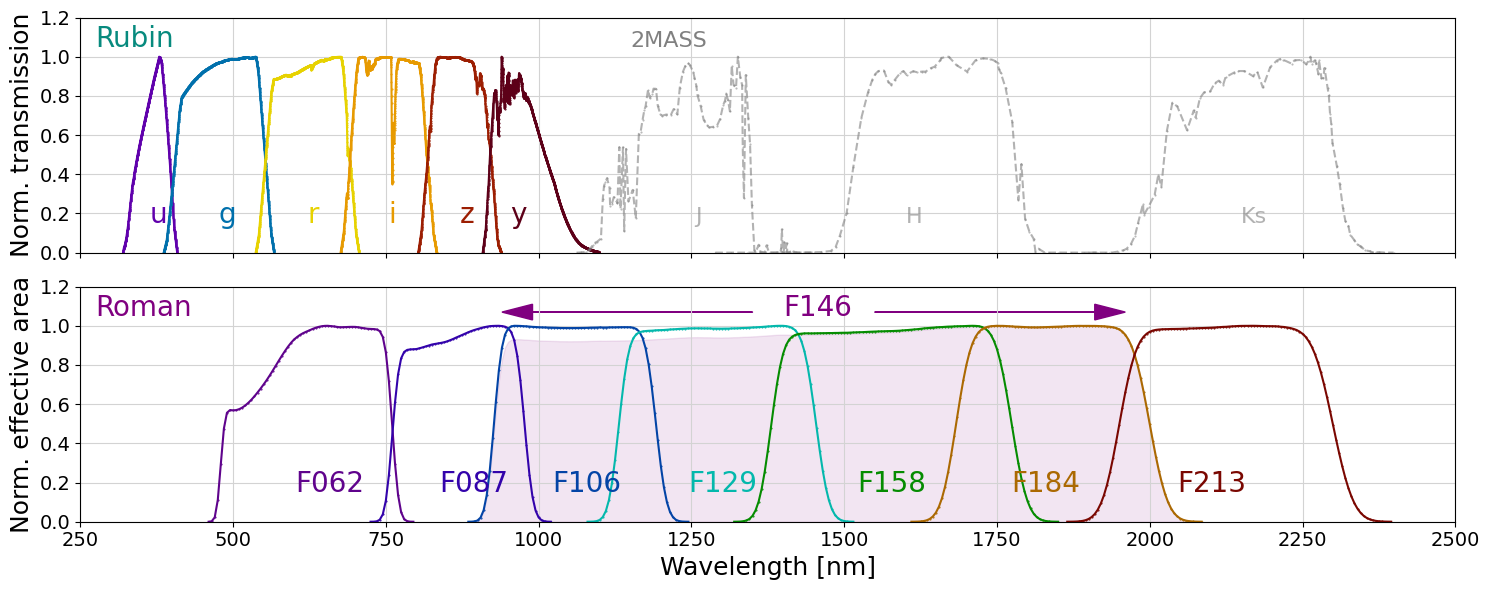

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(15,6))
plt.subplots_adjust(hspace=0.05)

# Plot Rubin transmission curves
for f, data, in rubin_data.items():
    xplot = data['col1'] / 10.0 # Convert Angstroms to nmnm
    yplot = data['col2'] / data['col2'].max()
    axs[0].plot(xplot, yplot, c=PLOT_COLORS[f], marker='.', markersize=1, ls=LINE_STYLES[f], label='Rubin '+f)

    xmid = xplot.min() + (xplot.max() - xplot.min())/2.0
    if f == 'y':
        xmid *= 0.95
    axs[0].text(xmid, 0.15, f, fontsize=20, color=PLOT_COLORS[f])

# Label Rubin filters
axs[0].text(275, 1.05, 'Rubin', fontsize=20, color='#078A7E') 

use_twomass = True
if use_twomass:
    for f, data, in twomass_data.items():
        xplot = data['col1'] / 10.0 # Convert Angstroms to nm
        yplot = data['col2'] / data['col2'].max()
        axs[0].plot(xplot, yplot, c='grey', marker='.', markersize=1, ls=LINE_STYLES[f], label=f, alpha=0.6)

        xmid = xplot.min() + (xplot.max() - xplot.min())/2.0
        axs[0].text(xmid, 0.15, f.replace('2MASS-',''), fontsize=16, color='grey', alpha=0.6)
    
    axs[0].text(1150, 1.05, '2MASS', fontsize=16, color='grey')
    
# Plot Roman filter transmission curves
# The Roman data are in units of effective telescope area in m2, so we normalize by the 
# maximum Roman collecting area 
roman_area = 2.4**2
for f, data, in roman_data.items():
    if f not in ['P127', 'G150', 'F146']:  # Exclude spectroscopic bandpasses for plot clarity
        xplot = data['col1'] / 10.0 # Convert Angstroms to nm
        #yplot = data['col2'] / roman_areanm
        yplot = data['col2'] / data['col2'].max()
        axs[1].plot(xplot, yplot, c=PLOT_COLORS[f], marker='.', markersize=1, ls=LINE_STYLES[f], label='Roman '+f)

        xmid = xplot.min() + (xplot.max() - xplot.min())/2.0
        xmid *= 0.96
        axs[1].text(xmid, 0.15, f, fontsize=20, color=PLOT_COLORS[f])
        
# Label Roman filters
axs[1].text(275, 1.05, 'Roman', fontsize=20, color='purple')

# Plot Roman's F146 filter separately because it is so wide it is hard to distinguish otherwise
data = roman_data['F146']
xplot = data['col1'] / 10.0 # Convert Angstroms to nm
#yplot = data['col2'] / roman_area
yplot = data['col2'] / data['col2'].max()
axs[1].fill_between(
        x=xplot, 
        y1=yplot, 
        color= "purple",
        alpha= 0.1,
        label='Roman F146'
)
axs[1].text(1400, 1.05, 'F146', fontsize=20, color='purple')
axs[1].arrow(1350, 1.07, -410, 0.0, head_width=0.08, head_length=50, length_includes_head=True, fc='purple', ec='purple')
axs[1].arrow(1550, 1.07, 410, 0.0, head_width=0.08, head_length=50, length_includes_head=True, fc='purple', ec='purple')

ymax = 1.1
#ymin, ymax = axs[0].get_ylim() 
axs[0].set_ylim([0.0, ymax])
#ymin, ymax = axs[1].get_ylim() 
axs[1].set_ylim([0.0, ymax])

yticks = axs[0].get_yticks() 
yticklabels = axs[0].get_yticklabels()
axs[0].set_yticks(yticks, yticklabels, fontsize=14)
axs[0].set_xticklabels([])

yticks = axs[1].get_yticks() 
yticklabels = axs[1].get_yticklabels()
axs[1].set_yticks(yticks, yticklabels, fontsize=14)

#xmin1, xmax1 = axs[0].get_xlim()
#xmin2, xmax2 = axs[1].get_xlim()
#xmin = min(xmin1, xmin2)
#xmax = max(xmax1, xmax2)
xmin = 250.0
xmax = 2500.0
axs[0].set_xlim([xmin, xmax])
axs[1].set_xlim([xmin, xmax])

xticks = axs[0].get_xticks() 
xticklabels = axs[0].get_xticklabels()
axs[0].set_xticks(xticks, xticklabels, fontsize=14)
xticks = axs[1].get_xticks() 
xticklabels = axs[1].get_xticklabels()
axs[1].set_xticks(xticks, xticklabels, fontsize=14)

axs[0].set_ylabel('Norm. transmission', fontsize=18)
#axs[0].set_title('Rubin and Roman Filter Bandpasses', fontsize=22)

axs[1].set_ylabel('Norm. effective area', fontsize=18)
axs[1].set_xlabel('Wavelength [nm]', fontsize=18)

#if not use_twomass:
#    axs[0].legend(bbox_to_anchor=(1.15, 1.0), fontsize=12)
#else:
#    axs[0].legend(bbox_to_anchor=(1.15, 1.05), fontsize=12)
#axs[1].legend(bbox_to_anchor=(1.15, 1.1), fontsize=12)

axs[0].grid(c='lightgrey')
axs[1].grid(c='lightgrey')

plt.tight_layout()
plt.savefig('./rubin_roman_filter_transmission_curves2.png')

Version with dark background

In [10]:
PLOT_COLORS = {
    "F062": "#C048FA",
    "F087": "#733DFC",
    "F106": "#5397FC",
    "F129": "#02F5E5",
    "F158": "#09EB02",
    "F184": "#FF9F0A",
    "F213": "#F20E02",
    "F146": "#C402F5",
    "G150": "#080f17",
    "P127": "#333033",
    "u": "#A745F5",
    "g": "#42B6F5",
    "r": "#e7d200",
    "i": "#e79a00",
    "z": "#F7431B",
    "y": "#A32142", 
    "2MASS-J": "#04b8ac", 
    "2MASS-H": "#058c01", 
    "2MASS-Ks": "#7a0701"
  }

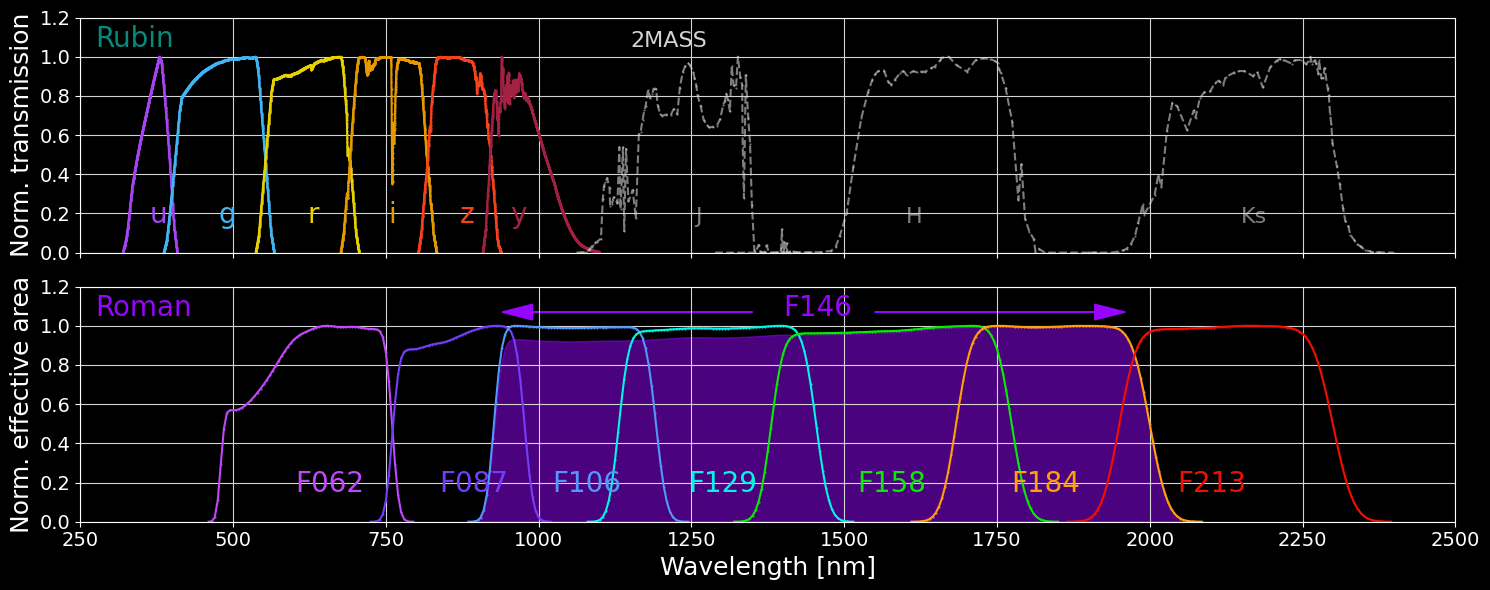

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(15,6))
plt.subplots_adjust(hspace=0.05)
plt.style.use('dark_background')

# Plot Rubin transmission curves
for f, data, in rubin_data.items():
    xplot = data['col1'] / 10.0 # Convert Angstroms to nmnm
    yplot = data['col2'] / data['col2'].max()
    axs[0].plot(xplot, yplot, c=PLOT_COLORS[f], marker='.', markersize=1, ls=LINE_STYLES[f], label='Rubin '+f)

    xmid = xplot.min() + (xplot.max() - xplot.min())/2.0
    if f == 'y':
        xmid *= 0.95
    axs[0].text(xmid, 0.15, f, fontsize=20, color=PLOT_COLORS[f])

# Label Rubin filters
axs[0].text(275, 1.05, 'Rubin', fontsize=20, color='#078A7E') 

use_twomass = True
if use_twomass:
    for f, data, in twomass_data.items():
        xplot = data['col1'] / 10.0 # Convert Angstroms to nm
        yplot = data['col2'] / data['col2'].max()
        axs[0].plot(xplot, yplot, c='lightgrey', marker='.', markersize=1, ls=LINE_STYLES[f], label=f, alpha=0.6)

        xmid = xplot.min() + (xplot.max() - xplot.min())/2.0
        axs[0].text(xmid, 0.15, f.replace('2MASS-',''), fontsize=16, color='lightgrey', alpha=0.6)
    
    axs[0].text(1150, 1.05, '2MASS', fontsize=16, color='lightgrey')
    
# Plot Roman filter transmission curves
# The Roman data are in units of effective telescope area in m2, so we normalize by the 
# maximum Roman collecting area 
roman_area = 2.4**2
for f, data, in roman_data.items():
    if f not in ['P127', 'G150', 'F146']:  # Exclude spectroscopic bandpasses for plot clarity
        xplot = data['col1'] / 10.0 # Convert Angstroms to nm
        #yplot = data['col2'] / roman_areanm
        yplot = data['col2'] / data['col2'].max()
        axs[1].plot(xplot, yplot, c=PLOT_COLORS[f], marker='.', markersize=1, ls=LINE_STYLES[f], label='Roman '+f)

        xmid = xplot.min() + (xplot.max() - xplot.min())/2.0
        xmid *= 0.96
        axs[1].text(xmid, 0.15, f, fontsize=20, color=PLOT_COLORS[f])
        
# Label Roman filters
axs[1].text(275, 1.05, 'Roman', fontsize=20, color='#9705FF')

# Plot Roman's F146 filter separately because it is so wide it is hard to distinguish otherwise
data = roman_data['F146']
xplot = data['col1'] / 10.0 # Convert Angstroms to nm
#yplot = data['col2'] / roman_area
yplot = data['col2'] / data['col2'].max()
axs[1].fill_between(
        x=xplot, 
        y1=yplot, 
        color= "#9705FF",
        alpha= 0.5,
        label='Roman F146'
)
axs[1].text(1400, 1.05, 'F146', fontsize=20, color='#9705FF')
axs[1].arrow(1350, 1.07, -410, 0.0, head_width=0.08, head_length=50, length_includes_head=True, fc='#9705FF', ec='#9705FF')
axs[1].arrow(1550, 1.07, 410, 0.0, head_width=0.08, head_length=50, length_includes_head=True, fc='#9705FF', ec='#9705FF')

ymax = 1.1
#ymin, ymax = axs[0].get_ylim() 
axs[0].set_ylim([0.0, ymax])
#ymin, ymax = axs[1].get_ylim() 
axs[1].set_ylim([0.0, ymax])

yticks = axs[0].get_yticks() 
yticklabels = axs[0].get_yticklabels()
axs[0].set_yticks(yticks, yticklabels, fontsize=14)
axs[0].set_xticklabels([])

yticks = axs[1].get_yticks() 
yticklabels = axs[1].get_yticklabels()
axs[1].set_yticks(yticks, yticklabels, fontsize=14)

#xmin1, xmax1 = axs[0].get_xlim()
#xmin2, xmax2 = axs[1].get_xlim()
#xmin = min(xmin1, xmin2)
#xmax = max(xmax1, xmax2)
xmin = 250.0
xmax = 2500.0
axs[0].set_xlim([xmin, xmax])
axs[1].set_xlim([xmin, xmax])

xticks = axs[0].get_xticks() 
xticklabels = axs[0].get_xticklabels()
axs[0].set_xticks(xticks, xticklabels, fontsize=14)
xticks = axs[1].get_xticks() 
xticklabels = axs[1].get_xticklabels()
axs[1].set_xticks(xticks, xticklabels, fontsize=14)

axs[0].set_ylabel('Norm. transmission', fontsize=18)
#axs[0].set_title('Rubin and Roman Filter Bandpasses', fontsize=22)

axs[1].set_ylabel('Norm. effective area', fontsize=18)
axs[1].set_xlabel('Wavelength [nm]', fontsize=18)

#if not use_twomass:
#    axs[0].legend(bbox_to_anchor=(1.15, 1.0), fontsize=12)
#else:
#    axs[0].legend(bbox_to_anchor=(1.15, 1.05), fontsize=12)
#axs[1].legend(bbox_to_anchor=(1.15, 1.1), fontsize=12)

axs[0].grid(c='lightgrey')
axs[1].grid(c='lightgrey')

plt.tight_layout()
plt.savefig('./rubin_roman_filter_transmission_curves_dark.png')